# Chapter 3 - a binary classification example

In [13]:
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters
from keras import models, layers
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np

import matplotlib.pyplot as plt

## Loading dataset

In [2]:
# Suggested code - doesn't work
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Workaround to load dataset:
https://stackoverflow.com/a/56243777


In [3]:

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

### Example of decoding a review back to English

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]   
)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preparing data

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


## Model definition

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

W0430 13:20:09.440442 4524492224 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0430 13:20:09.458427 4524492224 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0430 13:20:09.461168 4524492224 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0430 13:20:09.503308 4524492224 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.

## Creating a validation set

In [10]:
validation_size = 1000

x_val = x_train[:validation_size]
partial_x_train = x_train[validation_size:]

y_val = one_hot_train_labels[:validation_size]
partial_y_train = one_hot_train_labels[validation_size:]

## Training model

In [11]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

W0430 13:21:18.552726 4524492224 deprecation.py:323] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0430 13:21:18.619160 4524492224 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 139us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [=========

## Plotting the training and validation loss

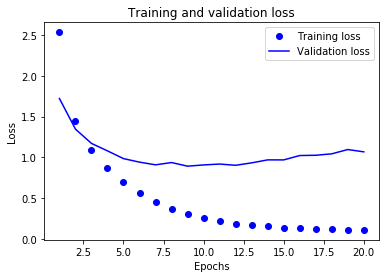

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

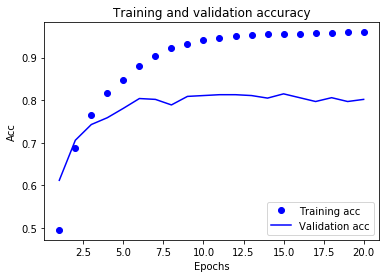

In [15]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Retraining model from scratch

In [16]:
odel = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    partial_x_train, 
    partial_y_train, 
    epochs=9, 
    batch_size=512
)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
7982/7982 [==============================] - 1s 97us/step - loss: 3.4695 - acc: 0.6369
Epoch 2/9
7982/7982 [==============================] - 1s 65us/step - loss: 2.7963 - acc: 0.7037
Epoch 3/9
7982/7982 [==============================] - 1s 65us/step - loss: 2.0486 - acc: 0.7482
Epoch 4/9
7982/7982 [==============================] - 1s 65us/step - loss: 1.4925 - acc: 0.7598
Epoch 5/9
7982/7982 [==============================] - 0s 61us/step - loss: 1.1784 - acc: 0.7783
Epoch 6/9
7982/7982 [==============================] - 0s 62us/step - loss: 0.9733 - acc: 0.7848
Epoch 7/9
7982/7982 [==============================] - 0s 61us/step - loss: 0.8223 - acc: 0.8193
Epoch 8/9
7982/7982 [==============================] - 1s 63us/step - loss: 0.7073 - acc: 0.8550
Epoch 9/9
2246/2246 [==============================] - 0s 92us/step


In [17]:
results

[1.3118193911741804, 0.7520035618878005]

In [18]:
predictions = model.predict(x_test)

In [20]:
np.argmax(predictions[1])

10